In [1]:
import warnings
import pickle

import numpy as np
import pandas as pd

from tqdm import tqdm
from glob import glob

from scipy import stats

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
warnings.simplefilter('ignore')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [64]:
embeds, rows = [], []

for path in tqdm(glob('../data/b7-embeds/*.p')):
    with open(path, 'rb') as fh:
        
        try:
            lines = pickle.load(fh)

            for line in lines:
                title = ' '.join(line.pop('tokens'))
                embeds.append(line.pop('embedding'))
                rows.append(dict(**line, title=title))
        
        except:
            pass

100%|██████████| 50/50 [00:10<00:00,  4.06it/s]


In [65]:
embeds = np.stack(embeds)

In [66]:
df = pd.DataFrame(rows)

In [67]:
df.label.unique()

array(['apnews.com', 'cnn.com', 'huffingtonpost.com', 'reuters.com',
       'breitbart.com', 'nytimes.com', 'foxnews.com'], dtype=object)

In [68]:
embeds.shape

(500000, 512)

In [91]:
d1 = df[df.label=='huffingtonpost.com']

In [92]:
d2p = d1.preds.apply(lambda p: p['breitbart.com'])

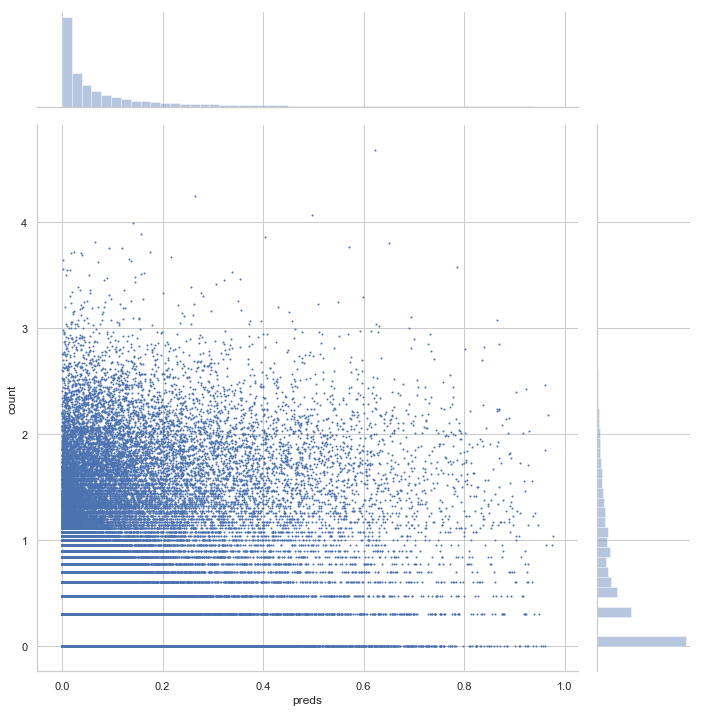

In [93]:
sns.jointplot(d2p, np.log10(d1['count']), height=10, s=1)

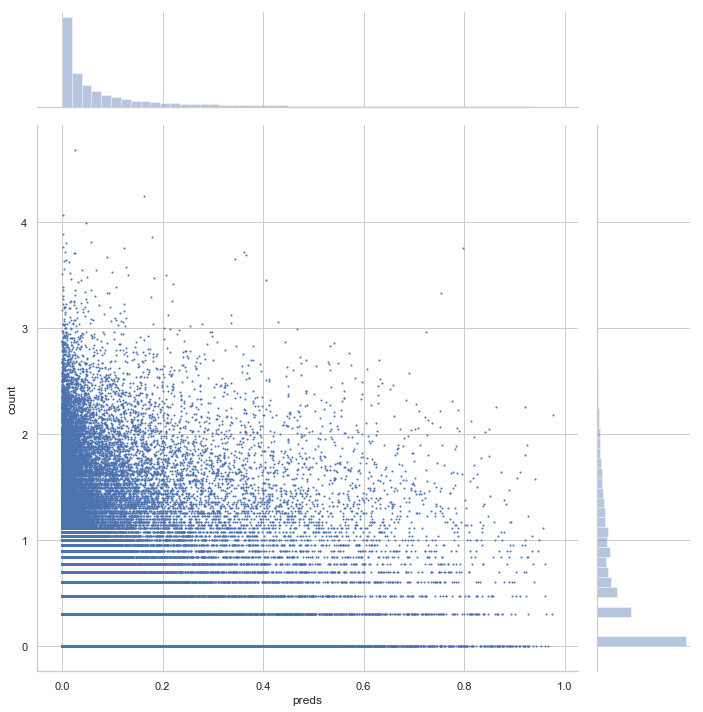

In [95]:
perm = np.random.permutation(len(d1))
sns.jointplot(d2p, np.log10(d1['count'].iloc[perm]), height=10, s=1)

In [96]:
perm = np.random.permutation(len(d1))

rows = zip(
    list(np.log10(d1['count'])) + list(np.log10(d1['count'].iloc[perm])),
    list(d2p) + list(d2p),
    (['obs']*len(d2p)) + (['rand']*len(d2p))
)

dfp = pd.DataFrame(list(rows), columns=('count', 'bbp', 'color'))
dfp = dfp.sample(frac=1)

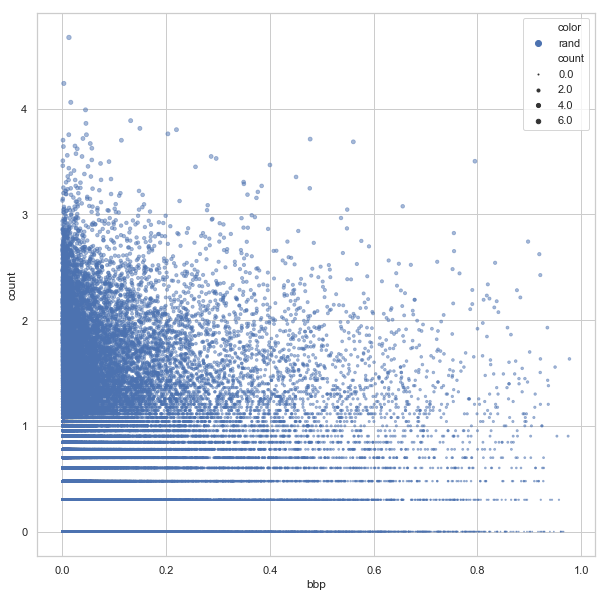

In [107]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    x='bbp', y='count', data=dfp[dfp.color=='rand'],
    hue='color',
    edgecolor=None, alpha=0.5, size='count', sizes=(1, 20)
)

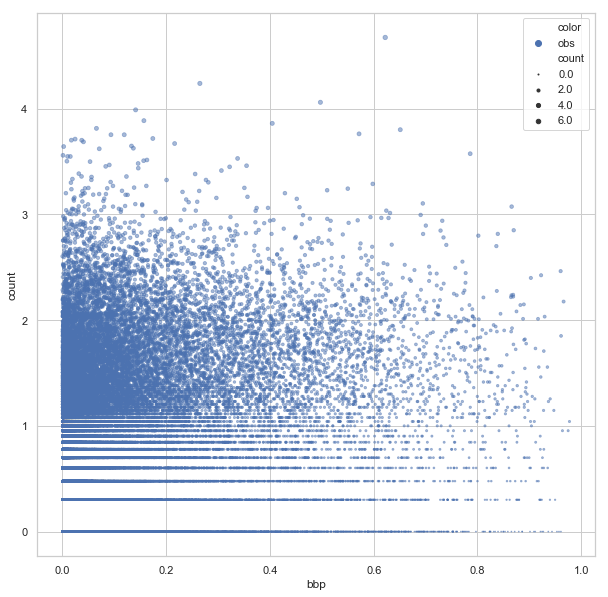

In [106]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    x='bbp', y='count', data=dfp[dfp.color=='obs'],
    hue='color',
    edgecolor=None, alpha=0.5, size='count', sizes=(1, 20)
)

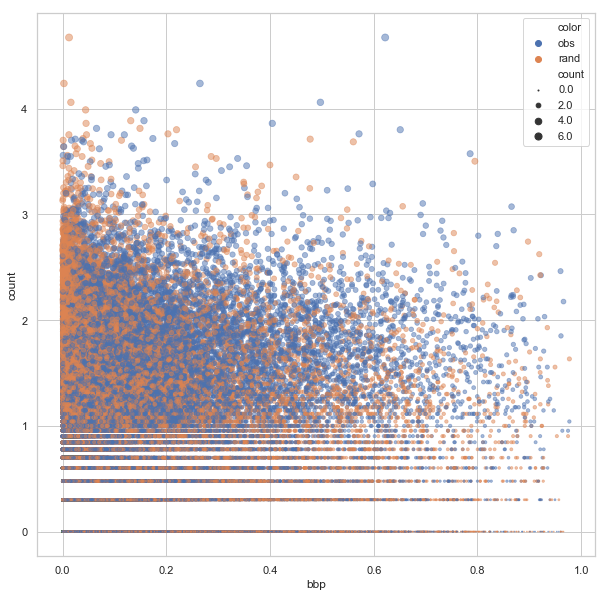

In [103]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    x='bbp', y='count', data=dfp,
    hue='color',
    edgecolor=None, alpha=0.5, size='count', sizes=(1, 50)
)

In [82]:
rows = []
for d1 in tqdm(df.label.unique()):
    
    ddf = df[df.label==d1]
    
    for d2 in df.label.unique():
        
        ps = ddf.preds.apply(lambda p: p[d2])
        
        counts = np.log10(ddf['count'])
        c_real, _ = stats.pearsonr(ps, counts)
        
        c_rand = []
        for _ in range(100):
            perm = perm = np.random.permutation(len(counts))
            c_rand.append(stats.pearsonr(ps, counts.iloc[perm])[0])

        z = (c_real - np.mean(c_rand)) / np.std(c_rand)
        rows.append((d1, d2, z))

100%|██████████| 7/7 [00:15<00:00,  2.30s/it]


In [83]:
zdf = pd.DataFrame(rows, columns=('d1', 'd2', 'z'))

In [86]:
zdf.sort_values('z', ascending=False)

,d1,d2,z
18,huffingtonpost.com,breitbart.com,60.703308
40,nytimes.com,nytimes.com,60.561430
37,nytimes.com,huffingtonpost.com,54.160588
46,foxnews.com,breitbart.com,48.247334
1,apnews.com,cnn.com,43.770453
20,huffingtonpost.com,foxnews.com,38.518495
32,breitbart.com,breitbart.com,34.546960
6,apnews.com,foxnews.com,30.914475
25,reuters.com,breitbart.com,28.536603
27,reuters.com,foxnews.com,25.072469


In [87]:
zdf.sort_values('z', ascending=True)

,d1,d2,z
35,nytimes.com,apnews.com,-84.804760
38,nytimes.com,reuters.com,-58.362876
42,foxnews.com,apnews.com,-52.156546
5,apnews.com,nytimes.com,-38.285233
16,huffingtonpost.com,huffingtonpost.com,-37.041638
24,reuters.com,reuters.com,-34.983096
47,foxnews.com,nytimes.com,-32.714431
19,huffingtonpost.com,nytimes.com,-28.767592
28,breitbart.com,apnews.com,-28.051853
33,breitbart.com,nytimes.com,-23.421641


In [88]:
zdf[zdf.d1==zdf.d2].sort_values('z', ascending=False)

,d1,d2,z
40,nytimes.com,nytimes.com,60.561430
32,breitbart.com,breitbart.com,34.546960
48,foxnews.com,foxnews.com,24.229674
8,cnn.com,cnn.com,-19.818058
0,apnews.com,apnews.com,-21.422509
24,reuters.com,reuters.com,-34.983096
16,huffingtonpost.com,huffingtonpost.com,-37.041638
